----
# Cuaderno 2 - Repaso de Pandas, Matplotlib, Seaborn y Plotly
## Ariel Palazzesi - 2026
----

En este cuaderno realizaremos un repaso integral de las principales librerías para manipulación y visualización de datos en Python. Trabajaremos nuevamente sobre un dataset de ventas disponible en Kaggle.

## Importación de librerías necesarias

Este fragmento de código importa cuatro librerías importantes para análisis y visualización de datos en Python: `pandas` para manipulación de datos tabulares, `matplotlib.pyplot` y `seaborn` para gráficos estáticos y personalizados, y `plotly.express` para gráficos interactivos. Luego, configura `seaborn` para que utilice un estilo de gráficos con fondo blanco y líneas de cuadrícula (`whitegrid`), lo que mejora la legibilidad de las visualizaciones.

Finalmente, ajusta el tamaño predeterminado de las figuras generadas con `matplotlib` a 8 pulgadas de ancho por 5 pulgadas de alto. Esto asegura que los gráficos tengan una escala adecuada y uniforme en la salida visual.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (8,5)

## Carga del dataset

Trabajaremos con el dataset **'Superstore Sales Dataset'** de Kaggle.

Dataset: https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting


Este código carga un archivo CSV llamado `train.csv` ubicado en la misma carpeta donde se ejecuta el script, o en la carpeta de Colab.

Utiliza `pandas` para leer el archivo y almacena los datos en un DataFrame llamado `df`. Luego, con `df.head()`, muestra las primeras cinco filas del DataFrame, lo que permite obtener una vista rápida de las primeras observaciones y de la estructura general de los datos (columnas y tipos de valores) que contiene el archivo.

In [3]:
ruta = 'train.csv'
df = pd.read_csv(ruta)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


## Pandas - Exploración y limpieza básica

Este bloque realiza un análisis exploratorio básico del DataFrame `df`.

* Primero, `df.info()` muestra información general como el número de filas, columnas, nombres de columnas, cantidad de valores no nulos y tipo de datos de cada columna.

* Luego, `df.isnull().sum()` detecta valores nulos, indicando cuántos faltantes hay en cada columna.

* Después, `df.describe()` genera un resumen estadístico con métricas como media, mediana, desviación estándar, valores mínimo y máximo, entre otros, para las columnas numéricas.

* Finalmente, `df[df['Sales'] > 1000].head()` filtra las filas donde las ventas (`Sales`) superan los 1000 y muestra las primeras cinco de esas filas, permitiendo analizar rápidamente las observaciones con ventas altas.



In [4]:
# Información general
df.info()

# Detectar valores nulos
df.isnull().sum()

# Resumen estadístico
df.describe()

# Filtrado de ventas altas
df[df['Sales'] > 1000].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
10,11,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.184
24,25,CA-2016-106320,25/09/2016,30/09/2016,Standard Class,EB-13870,Emily Burns,Consumer,United States,Orem,Utah,84057.0,West,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1044.630
27,28,US-2016-150630,17/09/2016,21/09/2016,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,Pennsylvania,19140.0,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.430
35,36,CA-2017-117590,08/12/2017,10/12/2017,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,Texas,75080.0,Central,TEC-PH-10004977,Technology,Phones,GE 30524EE4,1097.544
54,55,CA-2017-105816,11/12/2017,17/12/2017,Standard Class,JM-15265,Janet Molinari,Corporate,United States,New York City,New York,10024.0,East,TEC-PH-10002447,Technology,Phones,AT&T CL83451 4-Handset Telephone,1029.950


## Matplotlib - Gráficos básicos para explorar los datos

Vamos a generar nuestros primeros gráficos utilizando **Matplotlib**, una biblioteca de Python que permite representar datos de forma visual. Los gráficos son una herramienta clave en el análisis exploratorio de datos, ya que ayudan a comprender rápidamente cómo se distribuyen los valores y cómo se agrupan los datos dentro del conjunto.

Primero se construye un **histograma** a partir de la columna `Sales`. Este tipo de gráfico se utiliza cuando trabajamos con variables numéricas y queremos analizar su distribución.

En la instrucción `plt.hist(df['Sales'], bins=30, color='skyblue')`, el primer argumento indica la columna cuyos valores se van a graficar. El parámetro `bins=30` define en cuántos intervalos se dividirá el rango de valores de ventas: a mayor cantidad de intervalos, mayor detalle en la distribución. El argumento `color='skyblue'` establece el color de las barras para mejorar la legibilidad del gráfico.

Luego se agregan elementos descriptivos al gráfico. Con `plt.title()` se asigna un título que explica qué información se está mostrando, mientras que `plt.xlabel()` y `plt.ylabel()` definen las etiquetas de los ejes horizontal y vertical. En este caso, el eje horizontal representa los valores de ventas y el eje vertical indica cuántos registros aparecen en cada intervalo.

Finalmente, `plt.show()` se encarga de mostrar el gráfico en pantalla.

El segundo gráfico es un **gráfico de barras**, que se utiliza para comparar cantidades entre distintas categorías. Antes de graficar, se calcula cuántos registros hay en cada categoría usando `df['Category'].value_counts()`. Este método devuelve una serie donde cada categoría está asociada a la cantidad de veces que aparece en el dataset.

Con `plt.bar(cat_counts.index, cat_counts.values, color='coral')` se construye el gráfico de barras. El primer argumento (`cat_counts.index`) indica las categorías que se mostrarán en el eje horizontal, mientras que el segundo (`cat_counts.values`) representa la cantidad de registros correspondientes a cada una. El argumento `color='coral'` define el color de las barras para diferenciarlas visualmente.

Al igual que en el histograma, se agregan un título y etiquetas a los ejes para facilitar la interpretación del gráfico. Este tipo de visualización permite observar de forma clara cómo se distribuyen los registros entre las distintas categorías del conjunto de datos.

El objetivo de estos gráficos no es obtener conclusiones finales, sino **comenzar a familiarizarse con el dataset**, identificar patrones generales y desarrollar el hábito de explorar visualmente los datos antes de avanzar hacia etapas más complejas del análisis o del Machine Learning.


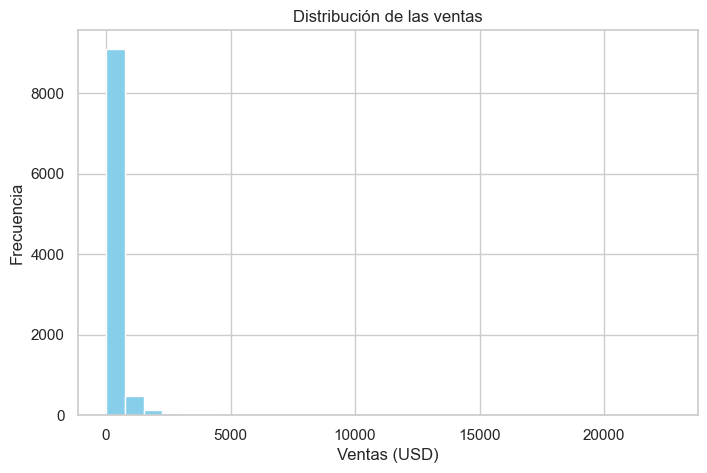

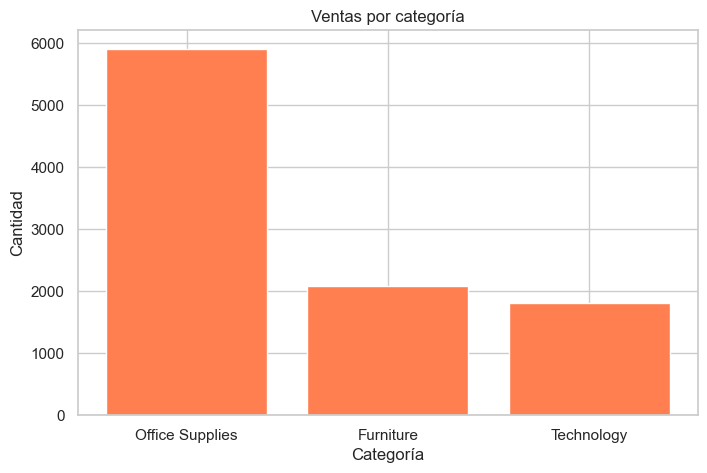

In [5]:
# Histograma
plt.hist(df['Sales'], bins=30, color='skyblue')
plt.title('Distribución de las ventas')
plt.xlabel('Ventas (USD)')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de barras
cat_counts = df['Category'].value_counts()
plt.bar(cat_counts.index, cat_counts.values, color='coral')
plt.title('Ventas por categoría')
plt.xlabel('Categoría')
plt.ylabel('Cantidad')
plt.show()

## Seaborn - Visualizaciones estadísticas

En esta sección utilizamos la biblioteca **Seaborn**, que está construida sobre Matplotlib y permite crear visualizaciones estadísticas más elaboradas y expresivas con menos código. Estas visualizaciones son especialmente útiles cuando queremos **comparar distribuciones** o **analizar relaciones entre variables**.

El primer gráfico que se genera es un **boxplot** (diagrama de caja), que permite comparar la distribución de las ventas (`Sales`) entre las distintas categorías de productos (`Category`). En la instrucción `sns.boxplot(x='Category', y='Sales', data=df)`, el argumento `x` indica la variable categórica que se ubicará sobre el eje horizontal, mientras que `y` especifica la variable numérica que se analizará. El parámetro `data=df` indica de qué DataFrame se extraen los datos.

El boxplot resume la distribución de los valores mediante varios elementos visuales: la línea central representa la **mediana**, la caja muestra el rango intercuartílico (entre el primer y el tercer cuartil) y los puntos que quedan fuera de los extremos indican posibles **valores atípicos**. Este tipo de gráfico es muy útil para detectar diferencias entre categorías y para observar si alguna presenta mayor dispersión o ventas inusualmente altas o bajas.

Luego se construye un **heatmap** o mapa de calor que representa la **matriz de correlación** entre las variables numéricas del conjunto de datos. La expresión `df.corr(numeric_only=True)` calcula los coeficientes de correlación lineal entre todas las columnas numéricas del DataFrame. El parámetro `numeric_only=True` asegura que solo se consideren variables numéricas, evitando errores con columnas categóricas o de texto.

La función `sns.heatmap()` recibe esta matriz como entrada. El argumento `annot=True` indica que se muestren los valores numéricos de correlación dentro de cada celda, lo que facilita la lectura del gráfico. El parámetro `cmap='coolwarm'` aplica una paleta de colores que va desde tonos fríos (correlaciones negativas) hasta tonos cálidos (correlaciones positivas), permitiendo identificar rápidamente relaciones fuertes o débiles entre variables.

Este tipo de visualización es útil para detectar **relaciones lineales** entre variables y para decidir, en etapas posteriores, qué variables podrían ser relevantes para un modelo de Machine Learning.

El objetivo de estas visualizaciones no es aún construir modelos, sino **comprender mejor la estructura interna de los datos**, identificar patrones, diferencias y posibles relaciones antes de avanzar hacia análisis más complejos.


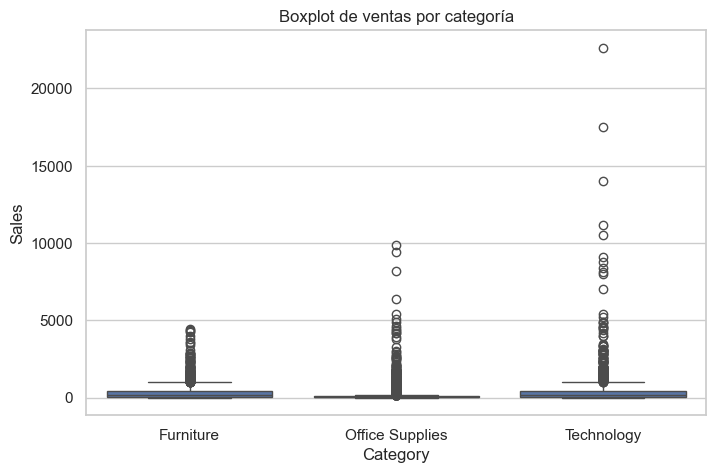

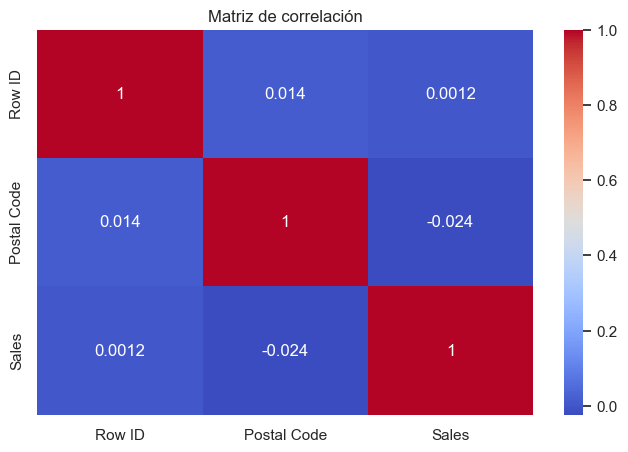

In [6]:
# Boxplot
sns.boxplot(x='Category', y='Sales', data=df)
plt.title('Boxplot de ventas por categoría')
plt.show()

# Heatmap de correlación
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

## Plotly - Visualizaciones interactivas

Ahora, utilizaremos **Plotly**, una biblioteca de visualización que se caracteriza por generar **gráficos interactivos**. A diferencia de Matplotlib y Seaborn, los gráficos creados con Plotly permiten al usuario interactuar con los datos: mover el cursor sobre los elementos, hacer zoom, filtrar categorías y explorar la información de manera dinámica.

El primer gráfico es un **diagrama de dispersión** (*scatter plot*), construido con la función `px.scatter()`. En este caso, el argumento `x='Sales'` indica que las ventas se representarán sobre el eje horizontal, mientras que `y='Country'` define que los países se ubiquen sobre el eje vertical. Cada punto del gráfico corresponde a un registro del dataset.

El parámetro `color='Category'` asigna un color distinto a cada categoría de producto, lo que permite comparar visualmente cómo se distribuyen las ventas por país según el tipo de producto. El argumento `title` agrega un título descriptivo que facilita la interpretación del gráfico. El resultado es una visualización que combina información numérica y categórica de forma clara e interactiva.

El segundo gráfico es un **gráfico de barras**, creado con `px.bar()`, que permite analizar las ventas según la región. En este caso, `x='Region'` define las regiones que aparecerán en el eje horizontal, mientras que `y='Sales'` indica los valores de ventas que se representarán en el eje vertical. El parámetro `color='Region'` asigna un color distinto a cada región, lo que mejora la diferenciación visual entre las barras.

Al igual que en el gráfico anterior, el argumento `title` se utiliza para describir el contenido del gráfico. Al tratarse de un gráfico interactivo, el usuario puede pasar el cursor sobre cada barra para ver el valor exacto de ventas asociado a cada región.

El uso de visualizaciones interactivas resulta especialmente útil en etapas exploratorias, ya que permite **examinar los datos con mayor profundidad** y descubrir patrones o diferencias que pueden pasar desapercibidos en gráficos estáticos.

In [7]:
fig1 = px.scatter(df, x='Sales', y='Country', color='Category', title='Ventas vs Paises')
fig1.show()

fig2 = px.bar(df, x='Region', y='Sales', color='Region', title='Ventas totales por región')
fig2.show()

## Seaborn - Countplot

Ahora utilizamos **Seaborn** para crear un **countplot**, un tipo de gráfico de barras especialmente diseñado para trabajar con **variables categóricas**. A diferencia de otros gráficos, `countplot()` se encarga automáticamente de contar cuántas veces aparece cada valor dentro de una columna, lo que simplifica mucho el análisis de frecuencias.

La instrucción `sns.countplot(x='Sub-Category', data=df, order=df['Sub-Category'].value_counts().index)` genera el gráfico tomando como eje horizontal la columna `Sub-Category`. El argumento `data=df` indica el DataFrame del cual se extraen los datos. El parámetro `order` se utiliza para definir el orden en el que se mostrarán las barras: al usar `df['Sub-Category'].value_counts().index`, las subcategorías se ordenan de mayor a menor según la cantidad de registros, lo que facilita identificar rápidamente cuáles son las más frecuentes.

Luego, con `plt.xticks(rotation=45)`, se rotan las etiquetas del eje X 45 grados. Esto es útil cuando las categorías tienen nombres largos, ya que evita que las etiquetas se superpongan y mejora la legibilidad del gráfico.

La función `plt.title()` agrega un título descriptivo que indica claramente qué información se está visualizando, y finalmente `plt.show()` muestra el gráfico en pantalla.

Este tipo de visualización permite observar cómo se distribuyen los registros entre las distintas subcategorías, identificar cuáles aparecen con mayor frecuencia y detectar posibles desbalances en los datos. Como en los casos anteriores, el objetivo no es aún sacar conclusiones finales, sino **comprender mejor la composición del dataset** antes de avanzar hacia etapas más complejas.


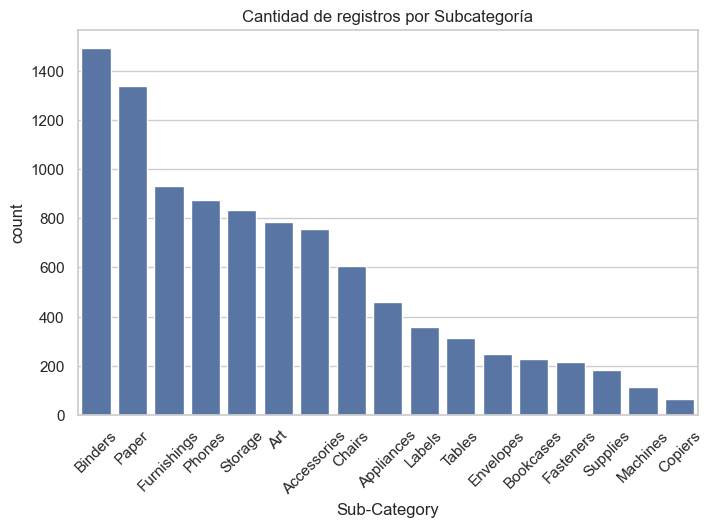

In [8]:
sns.countplot(x='Sub-Category', data=df, order=df['Sub-Category'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Cantidad de registros por Subcategoría')
plt.show()

## Plotly - Gráfico de líneas interactivo

También vamos a analizar la **evolución de las ventas a lo largo del tiempo** mediante un gráfico de líneas interactivo. Este tipo de visualización es útil cuando trabajamos con datos que incluyen fechas, ya que permite detectar tendencias, ciclos o cambios en el comportamiento de una variable.

El primer paso consiste en asegurarnos de que la columna `Order Date` sea interpretada correctamente como una fecha. Para ello se utiliza la función `pd.to_datetime()`, que convierte los valores de la columna a un tipo de dato fecha. El argumento `dayfirst=True` indica que el formato de las fechas es día/mes/año, algo habitual en muchos datasets y necesario para evitar errores de interpretación.

Luego, los datos se agrupan por fecha utilizando `groupby('Order Date')`. Al aplicar `.sum(numeric_only=True)`, se suman todas las columnas numéricas (como `Sales`) correspondientes a cada fecha. De esta forma, se obtiene el total de ventas por día. El método `reset_index()` se utiliza para que la fecha vuelva a ser una columna normal del DataFrame y no quede como índice, lo que facilita su uso posterior en el gráfico.

El DataFrame resultante, llamado `df_fecha`, contiene entonces una fila por cada fecha y los valores agregados de ventas para ese día.

Finalmente, se crea un **gráfico de líneas interactivo** utilizando `plotly.express` con la función `px.line()`. El argumento `x='Order Date'` indica que el eje horizontal representará el tiempo, mientras que `y='Sales'` define que el eje vertical mostrará las ventas. El parámetro `title` agrega un título descriptivo al gráfico.

Gracias a la interactividad de Plotly, este gráfico permite explorar los datos de forma dinámica, por ejemplo, desplazando el cursor sobre la línea para ver valores exactos o haciendo zoom sobre períodos específicos. Este tipo de análisis muy útil para identificar **tendencias temporales**, picos de ventas o posibles estacionalidades en los datos.


In [9]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df_fecha = df.groupby('Order Date').sum(numeric_only=True).reset_index()
px.line(df_fecha, x='Order Date', y='Sales', title='Ventas a lo largo del tiempo')

## Conclusión y cierre

En este cuaderno repasamos herramientas fundamentales para el análisis exploratorio de datos, como `Pandas`, `Matplotlib`, `Seaborn` y `Plotly`. Cada una de ellas aporta una perspectiva distinta para observar y entender los datos antes de construir modelos predictivos.

Aprendimos a detectar valores nulos, duplicados e inconsistencias, a visualizar distribuciones y relaciones entre variables, y a tomar decisiones informadas sobre qué datos limpiar o transformar. Estas habilidades no solo mejoran la calidad del análisis, sino que son esenciales para construir modelos confiables.

Este trabajo exploratorio y de limpieza es el primer paso para preparar nuestros datos y avanzar en el desarrollo de soluciones de Machine Learning. Cuanto más clara sea nuestra comprensión de los datos, mejores serán los modelos que construyamos sobre ellos.
